In [1]:
from warnings import simplefilter
simplefilter("ignore", category=FutureWarning) 
simplefilter("ignore", category=UserWarning)
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import os
pd_init()

In [2]:
texp = FCSExperiment.objects(experiment_id='PD_T_PDMCs').get()

In [3]:
t = Template(texp, '298-01_pdmc_t', include_controls=False)

In [4]:
t.load_template('PBMCt_Preprocessing')

True

Applying boundary...
------ boundary ------
New population: cells
...proportion of total events: 0.860
...proportion of parent: 0.860
New population: debris
...proportion of total events: 0.140
...proportion of parent: 0.140
-----------------------
Applying CD3_gate...
------ CD3_gate ------
New population: CD3+
...proportion of total events: 0.044
...proportion of parent: 0.051
New population: CD3-
...proportion of total events: 0.816
...proportion of parent: 0.949
-----------------------
Applying live_gate...
------ live_gate ------
New population: dead
...proportion of total events: 0.026
...proportion of parent: 0.592
New population: live
...proportion of total events: 0.018
...proportion of parent: 0.408
-----------------------
Applying singlets1_gate...
------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.014
...proportion of parent: 0.804
New population: doublets1
...proportion of total events: 0.004
...proportion of parent: 0.196
-------------

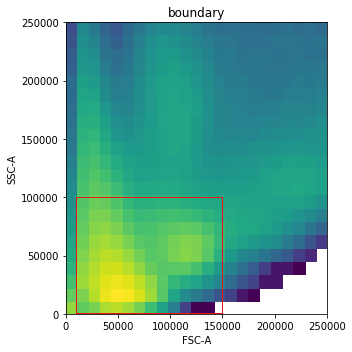

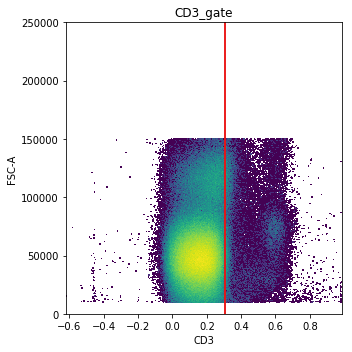

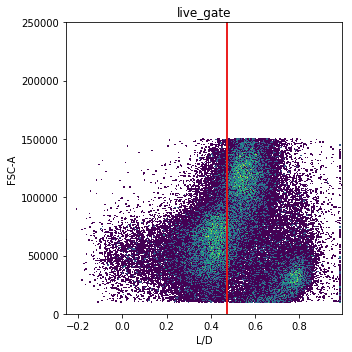

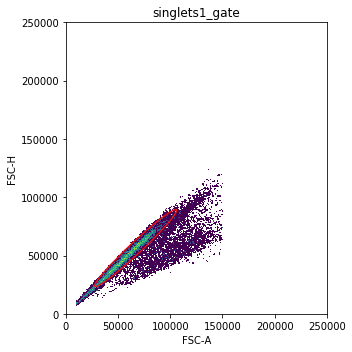

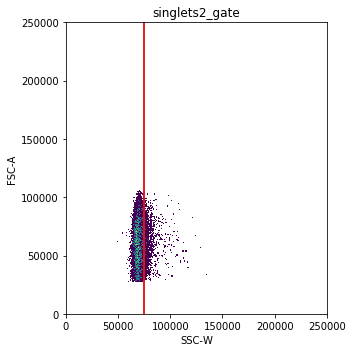

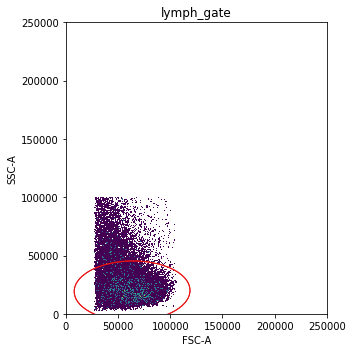

In [5]:
t.apply_many(apply_all=True, plot_outcome=True)

In [7]:
data = t.get_population_df('Lymphocytes', transform=True)

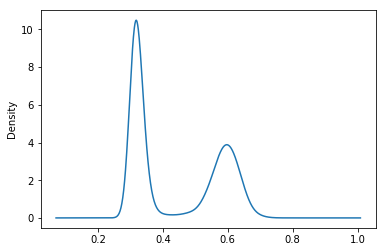

In [10]:
data['CD3'].plot('density')

In [11]:
pos_geom = t.fetch_geom('CD3+')
neg_geom = t.fetch_geom('CD3-')
pos_geom['threshold'] = 0.4
neg_geom['threshold'] = 0.4
new_geom = {'CD3+': pos_geom, 'CD3-': neg_geom}

In [12]:
t.edit_gate('CD3_gate', updated_geom=new_geom)

Editing gate: CD3_gate
Updating CD3+
Updating CD3-
The following gates are downstream of CD3_gate and will need to be applied again: ['live_gate', 'singlets1_gate', 'singlets2_gate', 'lymph_gate']
Edit complete!


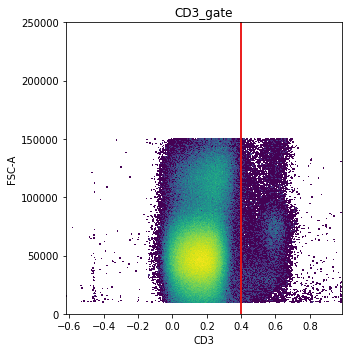

In [13]:
t.plotting.plot_gate('CD3_gate')

------ live_gate ------
New population: dead
...proportion of total events: 0.005
...proportion of parent: 0.348
New population: live
...proportion of total events: 0.010
...proportion of parent: 0.652
-----------------------


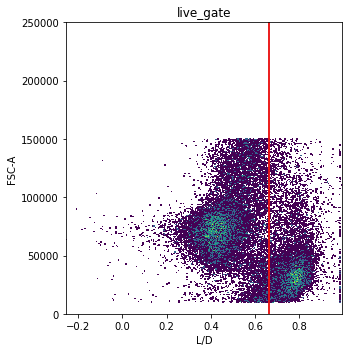

In [14]:
t.apply('live_gate')

------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.007
...proportion of parent: 0.726
New population: doublets1
...proportion of total events: 0.003
...proportion of parent: 0.274
-----------------------


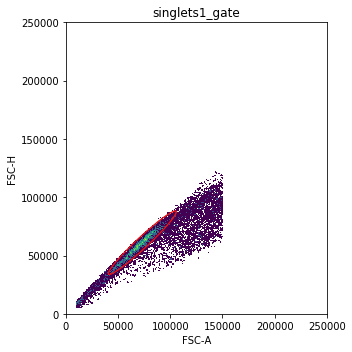

In [15]:
t.apply('singlets1_gate')

------ singlets2_gate ------
New population: doublets2
...proportion of total events: 0.000
...proportion of parent: 0.050
New population: single_Live_CD3+
...proportion of total events: 0.007
...proportion of parent: 0.950
-----------------------


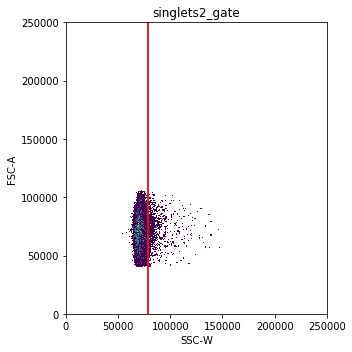

In [16]:
t.apply('singlets2_gate')

------ lymph_gate ------
New population: Lymphocytes
...proportion of total events: 0.007
...proportion of parent: 0.951
New population: other cells
...proportion of total events: 0.000
...proportion of parent: 0.049
-----------------------


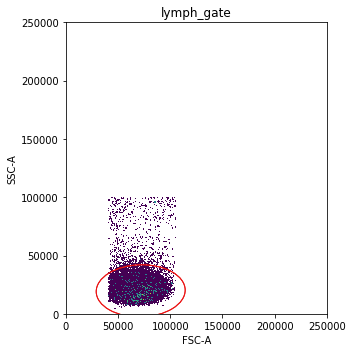

In [17]:
t.apply('lymph_gate')

In [18]:
data = t.get_population_df('Lymphocytes', transform=True)

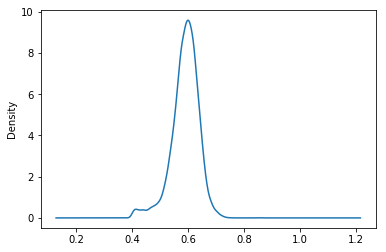

In [19]:
data['CD3'].plot('density')

In [20]:
t.save(overwrite=True)

Saved successfully!


True